In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# Permite desenhar uma linha de conexão entre diferentes figuras ou gráficos.
from matplotlib.patches import ConnectionPatch

#precisa ser usada apenas no google colab
from IPython.display import HTML
from matplotlib import rc

Cria uma figura fig com dois subgráficos (à esquerda axl e à direita axr) em uma linha (ncols=2).

sharey=True: Compartilha o eixo y entre os gráficos, alinhando-os verticalmente.

figsize=(6, 2): Define o tamanho da figura como 6x2 polegadas.

width_ratios=[1, 3]: Define que o gráfico à direita terá três vezes a largura do da esquerda.

wspace=0: Remove o espaço horizontal entre os dois gráficos.

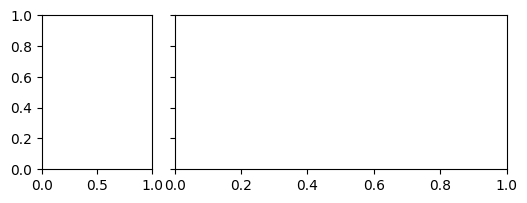

In [ ]:
fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0.1),
)

axl.set_aspect(1): Define a proporção dos eixos do gráfico esquerdo como 1:1 para garantir que o círculo desenhado seja um círculo perfeito.

axr.set_box_aspect(1 / 3): Define a proporção do gráfico direito, para que seja mais alongado horizontalmente.

axr.yaxis.set_visible(False): Oculta o eixo y no gráfico direito.

axr.xaxis.set_ticks(...): Define os rótulos do eixo x do gráfico direito.

In [ ]:
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

x = np.linspace(0, 2 * np.pi, 50): Cria uma sequência de valores de 0 a 2𝜋, representando ângulos em radianos.

axl.plot(np.cos(x), np.sin(x), "k", lw=0.3): Desenha um círculo no gráfico esquerdo, calculando as coordenadas x e y como cos(x) e sin(x),
respectivamente. "k" define a cor preta, e lw=0.3 define uma linha fina.

point, = axl.plot(0, 0, "o"): Cria um ponto inicial no centro do gráfico esquerdo. Este ponto será animado ao redor do círculo.

In [ ]:
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
point, = axl.plot(0, 0, "o")

axr.plot(x, np.sin(x)): Desenha a curva senoidal completa no gráfico direito como referência para definir os limites da visualização.

In [ ]:
sine, = axr.plot(x, np.sin(x))

ConnectionPatch(...): Cria uma linha de conexão entre os gráficos esquerdo e direito.

(1, 0) e (0, 0): Coordenadas iniciais nos gráficos esquerdo e direito, respectivamente.

"data": Define que as coordenadas são especificadas no sistema de coordenadas de dados de cada gráfico.

axesA=axl e axesB=axr: Especificam os gráficos a serem conectados.
color="C0": Define a cor da linha.

ls="dotted": Define que a linha será pontilhada.

fig.add_artist(con): Adiciona a linha de conexão à figura.

In [ ]:
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig.add_artist(con)

animate(i): Função chamada para cada frame da animação.

x = np.linspace(0, i, int(i * 25 / np.pi)): Define o eixo x da curva senoidal até a posição atual i.

sine.set_data(x, np.sin(x)): Atualiza a curva senoidal para que vá apenas até a posição i.

x, y = np.cos(i), np.sin(i): Calcula as coordenadas do ponto atual no círculo.

point.set_data([x], [y]): Atualiza a posição do ponto no círculo.

con.xy1 = x, y e con.xy2 = i, y: Atualizam as extremidades da linha de conexão para ligar o ponto no círculo à curva senoidal.
return point, sine, con: Retorna os elementos atualizados para a animação.

In [ ]:
def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con

In [ ]:
ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    blit=False,  # blitting can't be used with Figure artists
    frames=x,
    repeat_delay=100,
)

In [ ]:
# Configuração para Jupyter Notebook ou Google Colab
rc('animation', html='jshtml')
ani